In [2]:
# Essential Library Imports
"""
This section imports all necessary libraries for data analysis, visualization, 
and machine learning model development.
"""

# Core data manipulation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries for model development and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Visualization configuration for consistent and professional plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("All required libraries have been successfully imported.") 

In [5]:
# Data Loading and Basic Information Extraction
"""
Load the phishing detection dataset and perform initial data exploration.
This includes examining data structure, dimensions, and basic statistics.
"""

# Load the dataset from CSV file
df = pd.read_csv('Phishing_Legitimate_full.csv')

print("DATASET GENERAL INFORMATION")
print("=" * 50)
print(f"Total number of samples: {len(df):,}")
print(f"Number of features: {df.shape[1]-1}")
print(f"Target variable: CLASS_LABEL (0: Legitimate, 1: Phishing)")
print(f"Dataset dimensions: {df.shape}")

# Display first few rows to understand data structure
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Comprehensive data information
print("\nDETAILED DATASET INFORMATION")
print("=" * 50)
df.info()

# Statistical summary of all features
print("\nSTATISTICAL SUMMARY")
print("=" * 50)
display(df.describe().round(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


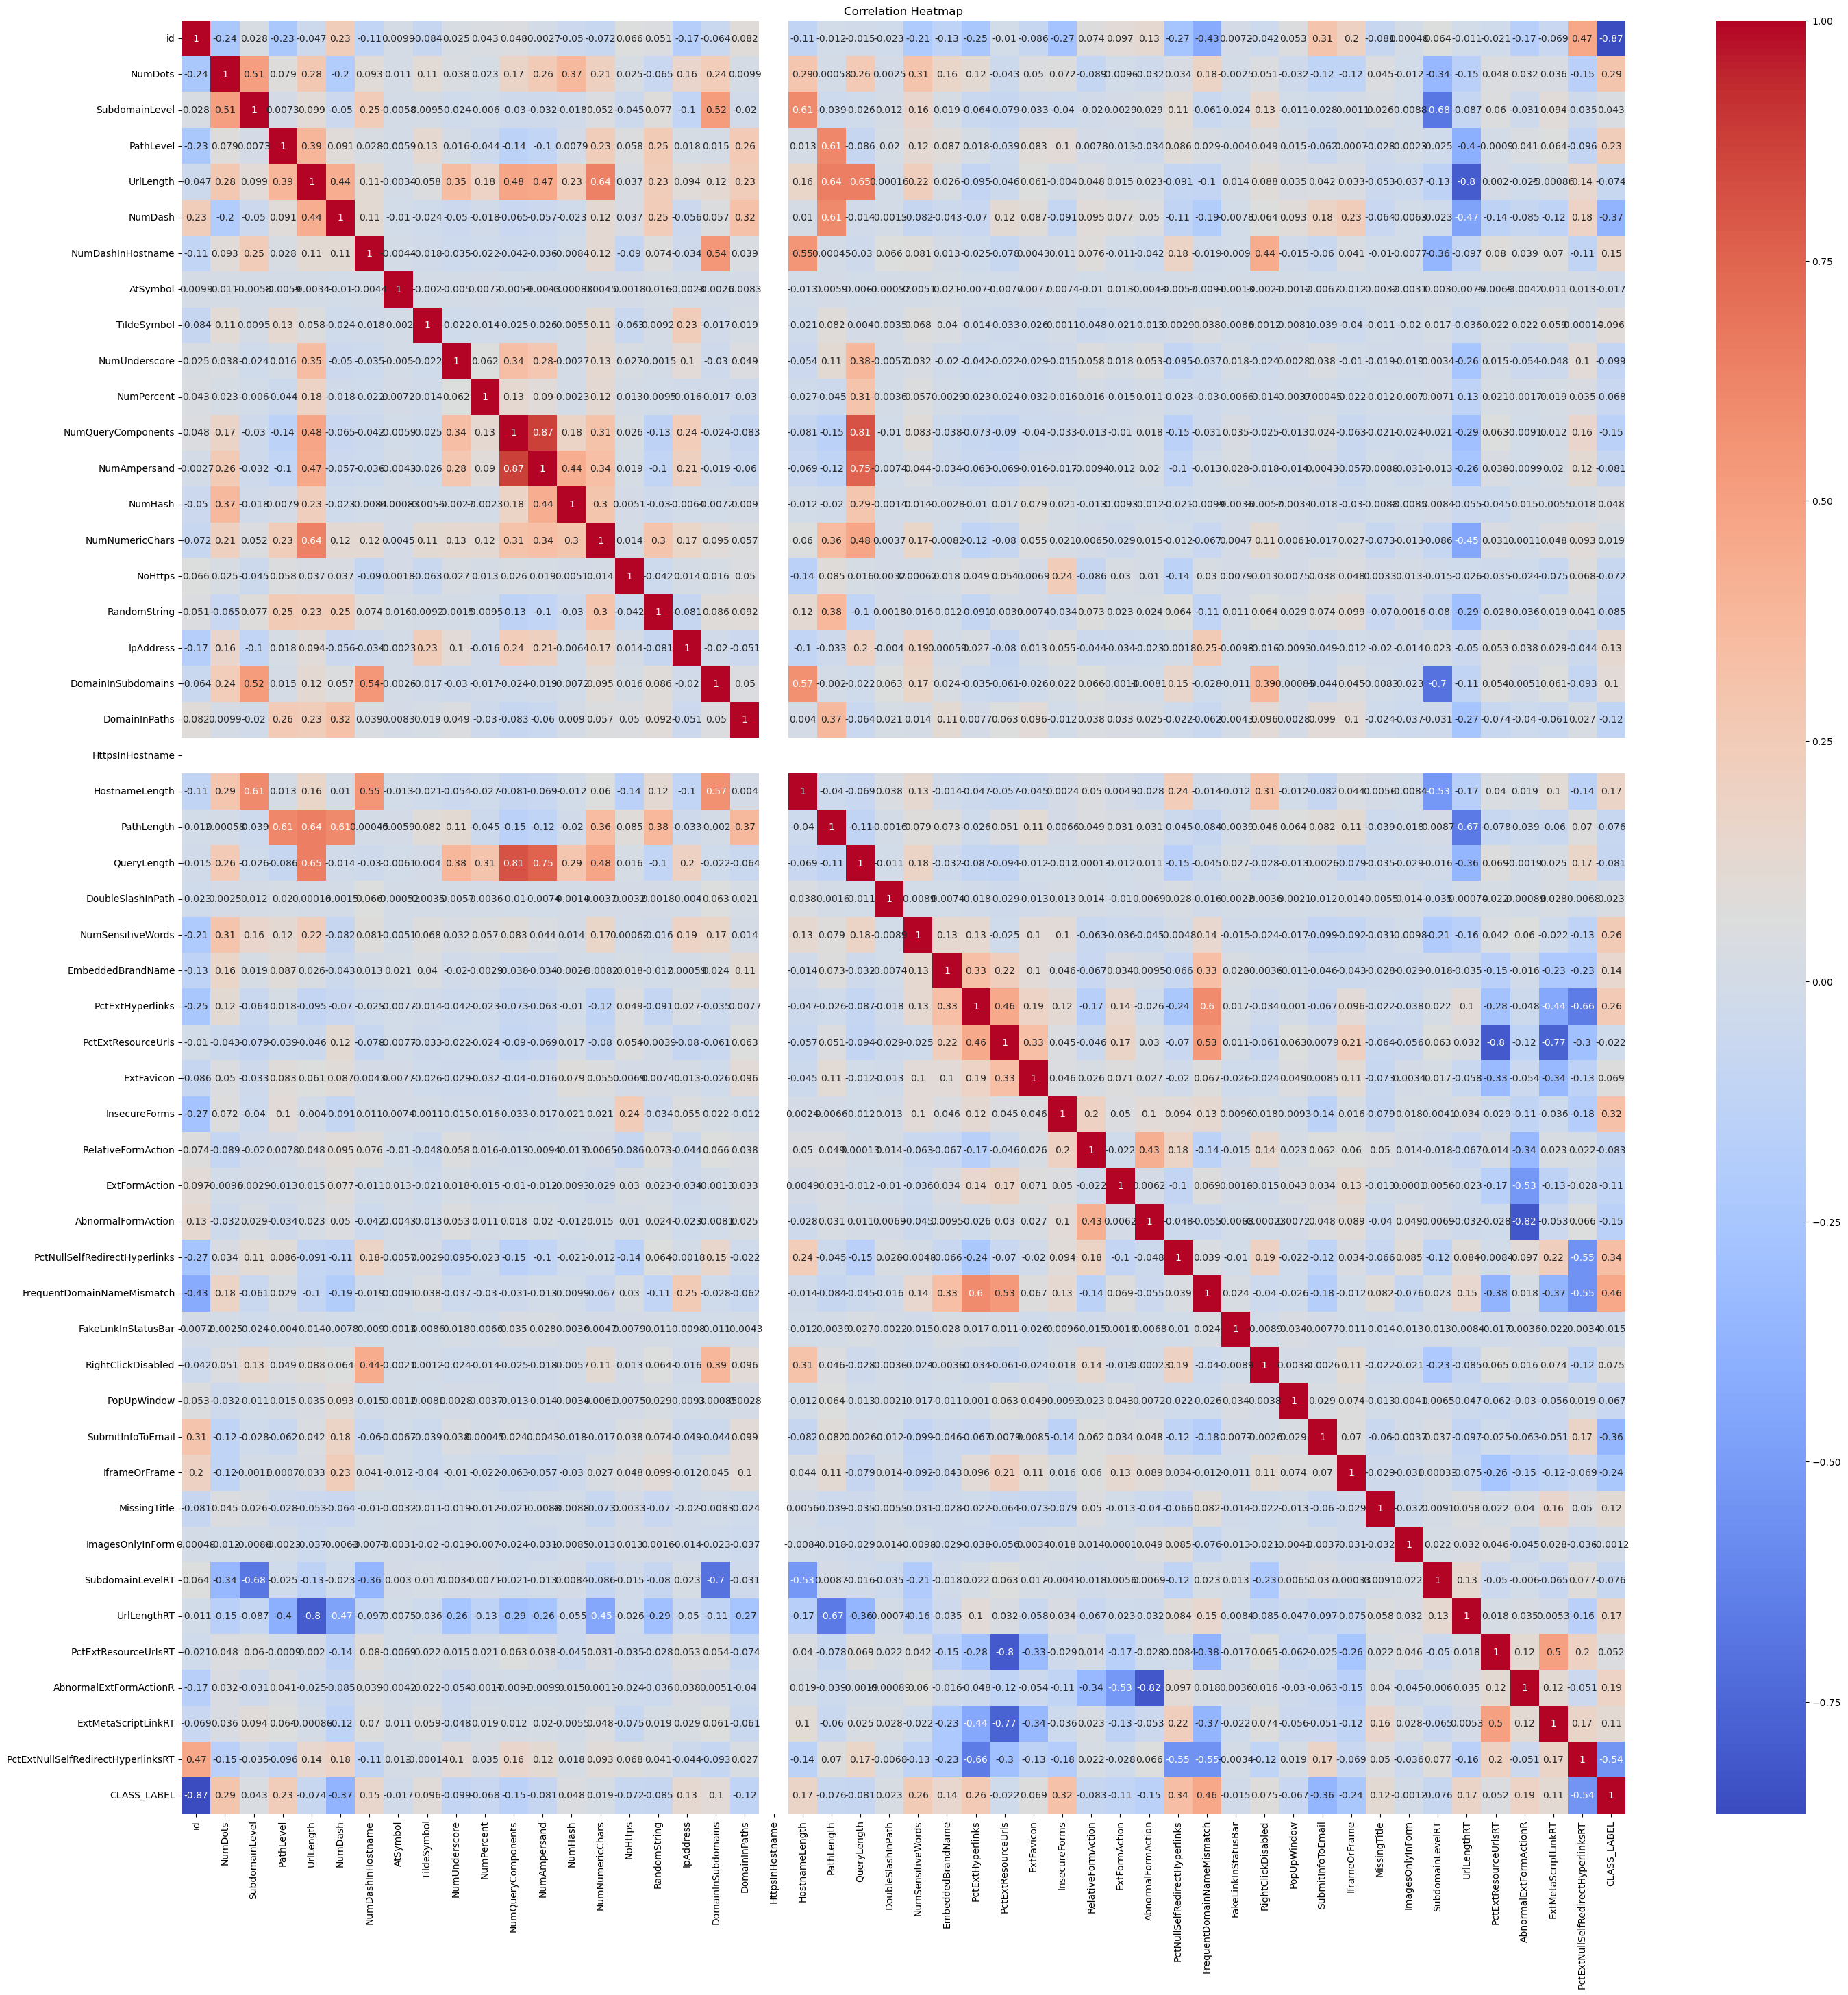

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(34, 34))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Hedef değişkenin dağılımı
target_counts = df['CLASS_LABEL'].value_counts()
target_percentages = df['CLASS_LABEL'].value_counts(normalize=True) * 100

print("🎯 HEDEF DEĞİŞKEN DAĞILIMI")
print("=" * 50)
print(f"Meşru Siteler (0): {target_counts[0]:,} ({target_percentages[0]:.1f}%)")
print(f"Phishing Siteler (1): {target_counts[1]:,} ({target_percentages[1]:.1f}%)")

# Görselleştirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Çubuk grafik
target_counts.plot(kind='bar', ax=ax1, color=['#2E8B57', '#DC143C'])
ax1.set_title('Sınıf Dağılımı - Sayı', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sınıf (0: Meşru, 1: Phishing)')
ax1.set_ylabel('Örnek Sayısı')
ax1.tick_params(axis='x', rotation=0)

# Pasta grafik
ax2.pie(target_counts.values, labels=['Meşru Siteler', 'Phishing Siteler'], 
        autopct='%1.1f%%', colors=['#2E8B57', '#DC143C'], startangle=90)
ax2.set_title('Sınıf Dağılımı - Yüzde', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Veri seti dengeli: Her iki sınıfta da eşit sayıda örnek bulunuyor.")


In [ ]:
# Eksik değerlerin kontrolü
print("🔍 EKSİK DEĞER ANALİZİ")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({
    'Eksik Değer Sayısı': missing_values,
    'Eksik Değer Yüzdesi': missing_percentage
})

missing_info = missing_info[missing_info['Eksik Değer Sayısı'] > 0]

if len(missing_info) > 0:
    print("Eksik değerler tespit edildi:")
    display(missing_info)
else:
    print("✅ Hiç eksik değer bulunmadı!")

# Duplicate kontrol
print(f"\n🔄 DUPLICATE KAYIT KONTROLÜ")
print("=" * 50)
duplicate_count = df.duplicated().sum()
print(f"Duplicate kayıt sayısı: {duplicate_count}")

if duplicate_count > 0:
    print("Duplicate kayıtlar kaldırılıyor...")
    df = df.drop_duplicates()
    print(f"✅ {duplicate_count} duplicate kayıt kaldırıldı.")
    print(f"Yeni veri boyutu: {df.shape}")
else:
    print("✅ Duplicate kayıt bulunmadı!")

# Veri tiplerinin kontrolü
print(f"\n📊 VERİ TİPLERİ")
print("=" * 50)
print(df.dtypes.value_counts())


## Keşifsel Veri Analizi (EDA)


In [ ]:
# En önemli özelliklerin analizi
important_features = ['NumDots', 'UrlLength', 'NumDash', 'HostnameLength', 
                     'PathLength', 'NoHttps', 'RandomString', 'IpAddress']

# Özellik dağılımlarının sınıflara göre karşılaştırılması
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    phishing_data = df[df['CLASS_LABEL'] == 1][feature]
    legitimate_data = df[df['CLASS_LABEL'] == 0][feature]
    
    axes[i].hist(legitimate_data, alpha=0.7, label='Meşru', bins=30, color='#2E8B57')
    axes[i].hist(phishing_data, alpha=0.7, label='Phishing', bins=30, color='#DC143C')
    axes[i].set_title(f'{feature} Dağılımı', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekans')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('🔍 Önemli Özelliklerin Sınıflara Göre Dağılımı', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# 🔗 Korelasyon Analizi - Özellikler arası ilişkilerin incelenmesi
"""
Bu bölümde özelliklerin birbiriyle olan korelasyonlarını analiz ederek:
1. Hangi özelliklerin birbirine benzer bilgiler içerdiğini
2. Hedef değişkenle en yüksek korelasyona sahip özellikleri
3. Multicollinearity problemini tespit ederiz
"""

# 📊 Korelasyon matrisinin hesaplanması
correlation_matrix = df.corr()

# 🎯 Hedef değişkenle en yüksek korelasyona sahip özelliklerin belirlenmesi
target_correlations = correlation_matrix['CLASS_LABEL'].abs().sort_values(ascending=False)
top_features = target_correlations.head(15)  # İlk 15 özellik

print("🎯 HEDEF DEĞİŞKENLE EN YÜKSEK KORELASYONLU ÖZELLİKLER")
print("=" * 60)
for feature, corr in top_features.items():
    if feature != 'CLASS_LABEL':
        print(f"📌 {feature:<30}: {corr:.4f}")

# 🌡️ Korelasyon haritasının görselleştirilmesi (top 20 özellik)
plt.figure(figsize=(16, 14))
top_20_features = target_correlations.head(21).index  # CLASS_LABEL dahil 21
correlation_subset = correlation_matrix.loc[top_20_features, top_20_features]

# 🎨 Heatmap oluşturma
sns.heatmap(correlation_subset, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Korelasyon Katsayısı'})

plt.title('🔍 En Önemli Özelliklerin Korelasyon Haritası', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n💡 Analiz: En yüksek korelasyonlu özellikler model eğitiminde priorite alacak")


## 🔬 Özellik Mühendisliği ve Seçimi


In [ ]:
# 🔬 Özellik Mühendisliği ve Seçimi 
"""
🎯 Bu bölümde amacımız:
1. 📊 En önemli özellikleri belirlemek
2. 🧬 Yeni özellikler oluşturmak  
3. ⚡ Model performansını artıracak özellikleri seçmek
4. 🗑️ Gereksiz özellikleri elemek
"""

# 🎯 Özellik önemlilik skorlarının hesaplanması (Random Forest ile)
print("🌳 RANDOM FOREST İLE ÖZELLİK ÖNEMLİLİK ANALİZİ")
print("=" * 60)

# 📊 Verinin hazırlanması
X = df.drop(['CLASS_LABEL', 'id'], axis=1)  # 🗑️ ID sütununu da çıkarıyoruz
y = df['CLASS_LABEL']

# 🌳 Random Forest modeli ile özellik önemliliği
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X, y)

# 📈 Özellik önemlilik skorları
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

# 🏆 En önemli 15 özellik
top_15_features = feature_importance.head(15)

print("🏆 EN ÖNEMLİ 15 ÖZELLİK:")
print("-" * 40)
for idx, row in top_15_features.iterrows():
    print(f"🔹 {row['Feature']:<25}: {row['Importance']:.4f}")

# 📊 Görselleştirme
plt.figure(figsize=(14, 8))
top_20 = feature_importance.head(20)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20)))

bars = plt.barh(range(len(top_20)), top_20['Importance'], color=colors)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('📊 Özellik Önemlilik Skoru')
plt.title('🏆 En Önemli 20 Özellik - Random Forest Analizi', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# 📈 Değerleri çubukların üzerine yazma
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n💡 Analiz Sonucu: İlk 15 özellik toplam varyansın {top_15_features['Importance'].sum():.2%}'ini açıklıyor")


In [ ]:
# Model Development and Training
"""
This section implements multiple machine learning algorithms for phishing detection.
We'll train and evaluate different models to find the best performing approach.
"""

# Data Preparation for Machine Learning
print("DATA PREPARATION FOR MACHINE LEARNING")
print("=" * 50)

# Prepare features and target variable
X = df.drop(['CLASS_LABEL', 'id'], axis=1)  # Remove target and ID columns
y = df['CLASS_LABEL']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature Scaling for algorithms that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed successfully.")


In [ ]:
# Multiple Algorithm Implementation and Comparison
"""
Implement and train multiple machine learning algorithms to compare their performance
on the phishing detection task. This includes both traditional ML and ensemble methods.
"""

# Initialize multiple machine learning models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Store results for comparison
results = {}
print("MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Use scaled data for SVM and Logistic Regression, original for tree-based models
    if model_name in ['Support Vector Machine', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_prob
    }
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

print("\nAll models have been successfully trained and evaluated.")


## Model Performance Analysis and Visualization


In [ ]:
# Comprehensive Performance Comparison and Visualization
"""
Create detailed performance comparisons and visualizations to identify 
the best performing model and understand model behavior.
"""

# Create performance comparison dataframe
performance_df = pd.DataFrame.from_dict(
    {name: {metric: value for metric, value in model_results.items() 
            if metric not in ['Model', 'Predictions', 'Probabilities']} 
     for name, model_results in results.items()}, 
    orient='index'
)

print("DETAILED PERFORMANCE COMPARISON")
print("=" * 60)
print(performance_df.round(4))

# Identify best performing model
best_model_name = performance_df['F1-Score'].idxmax()
best_model_f1 = performance_df.loc[best_model_name, 'F1-Score']
print(f"\nBest performing model: {best_model_name} (F1-Score: {best_model_f1:.4f})")

# Create comprehensive visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(performance_df.index))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0, 0].bar(x_pos + i * width, performance_df[metric], width, 
                   label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Model Performance Comparison - All Metrics')
axes[0, 0].set_xticks(x_pos + width * 2)
axes[0, 0].set_xticklabels(performance_df.index, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. ROC Curves for all models
for model_name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['Probabilities'])
    auc_score = results[model_name]['ROC-AUC']
    axes[0, 1].plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

axes[0, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curves Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion Matrix for best model
best_predictions = results[best_model_name]['Predictions']
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# 4. F1-Score comparison (focused view)
f1_scores = performance_df['F1-Score'].sort_values(ascending=True)
colors = ['red' if x == best_model_name else 'skyblue' for x in f1_scores.index]
axes[1, 1].barh(range(len(f1_scores)), f1_scores.values, color=colors)
axes[1, 1].set_yticks(range(len(f1_scores)))
axes[1, 1].set_yticklabels(f1_scores.index)
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].set_title('F1-Score Comparison (Best Model Highlighted)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nModel evaluation completed. {best_model_name} achieved the highest F1-Score.")


## Detailed Classification Analysis and Insights


In [ ]:
# Detailed Classification Report and Feature Importance Analysis
"""
Generate comprehensive classification reports and analyze feature importance
to understand what characteristics make websites suspicious.
"""

# Generate detailed classification report for best model
print("DETAILED CLASSIFICATION REPORT")
print("=" * 50)
print(f"Model: {best_model_name}")
print(classification_report(y_test, best_predictions, 
                          target_names=['Legitimate', 'Phishing']))

# Feature Importance Analysis (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    best_model = results[best_model_name]['Model']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTOP 15 MOST IMPORTANT FEATURES - {best_model_name}")
    print("=" * 60)
    for idx, row in feature_importance.head(15).iterrows():
        print(f"{row['Feature']:<30}: {row['Importance']:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance Score')
    plt.title(f'Top 20 Most Important Features - {best_model_name}')
    plt.gca().invert_yaxis()
    
    # Add importance values to bars
    for i, v in enumerate(top_features['Importance']):
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Cross-validation analysis for model reliability
print(f"\nCROSS-VALIDATION ANALYSIS - {best_model_name}")
print("=" * 50)

# Perform 5-fold cross-validation
if best_model_name in ['Support Vector Machine', 'Logistic Regression']:
    cv_scores = cross_val_score(results[best_model_name]['Model'], 
                               X_train_scaled, y_train, cv=5, scoring='f1')
else:
    cv_scores = cross_val_score(results[best_model_name]['Model'], 
                               X_train, y_train, cv=5, scoring='f1')

print(f"Cross-validation F1-scores: {cv_scores}")
print(f"Mean CV F1-score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Model stability: {'High' if cv_scores.std() < 0.02 else 'Moderate' if cv_scores.std() < 0.05 else 'Low'}")

print("\nAnalysis completed successfully.")
